In [1]:
%matplotlib notebook 
# Import modules
import os
import math
import numpy as np
import matplotlib.pyplot
import re
import pandas as pd
from scipy.stats import norm

In [2]:
def read_scale_k (filename):
    k = []
    with open(filename, "r") as openfile:
        for line in openfile:
            if 'k-eff' in line:
                k.append(float(next(openfile, '')))
    return k # list of K_eff for all burnup steps

def read_scale_bu(filename):
    bu = []
    list_bu = []
    read = False
    with open(filename, "r") as openfile:
        for line in openfile:
            if 'Burnups' in line:
                read = True
                continue
            elif 'Time' in line:
                read = False
                continue
            elif read:
                list_bu = line[1:-1].split(' ')
                bu += list(map(float, list_bu))
            #print(line)
    return bu


dir = '../pincell/sampler.samplerfiles/'
prefix = 'c1_pert_0'
fnum0 = 0   # first file index
fnume = 999  # last file index

k_ds = []

for num in range(0, fnume-fnum0+1):
    txt_file = dir+prefix+format(num, '04d')+'.t16'
    if num is 0:
        bu_ds = read_scale_bu(txt_file)
    #print(txt_file)
    k_ds.append(read_scale_k(txt_file))
    #k_eds_ds.append(read_scale_k(txt_file)[-1])

k_ds_array = np.array(k_ds)
print(k_ds_array.shape)
#print(k_ds_array)
#print(k_ds_array[:,0])
#print(k_ds[0])
#print(k_ds[-1])
#print (np.array(k_bds_ds)-np.array(k_eds_ds))
#print (k_bds_ds)
#print (k_eds_ds)

print(bu_ds)
print(np.array([30, 60, 90, 120, 150, 180])*(18.5438)/(33.6))

(1000, 7)
[0.0, 0.278157, 1.112628, 2.503413, 4.450512, 6.953925, 10.01365]
[ 16.55696429  33.11392857  49.67089286  66.22785714  82.78482143
  99.34178571]


In [3]:
k_eff = []
std_k = []
rel_err = []
nsamp, nt = k_ds_array.shape

for t in range(nt):
    k_eff.append(np.median(k_ds_array[:,t]))
    std_k.append(1e+5*np.std(k_ds_array[:,t]))
    rel_err.append(100*np.std(k_ds_array[:,t])/np.median(k_ds_array[:,t]))

print(k_eff)            
print(std_k)
print(r"Keff at BOC %5.3f +- %5.3f pcm; Std/mean %5.2f %%" %(k_eff[0],std_k[0], rel_err[0]))
print(r"Keff at EOC %5.3f +- %5.3f pcm; Std/mean %5.2f %%" %(k_eff[-1],std_k[-1], rel_err[-1]))

[1.017323, 1.000739, 0.99024749999999995, 0.97508335000000002, 0.95675684999999999, 0.93772549999999999, 0.91967379999999999]
[810.47512662845054, 792.08025248354727, 771.40732518107177, 746.41732510837926, 719.61630566851591, 690.00836253184752, 659.80788068073264]
Keff at BOC 1.017 +- 810.475 pcm; Std/mean  0.80 %
Keff at EOC 0.920 +- 659.808 pcm; Std/mean  0.72 %


<IPython.core.display.Javascript object>


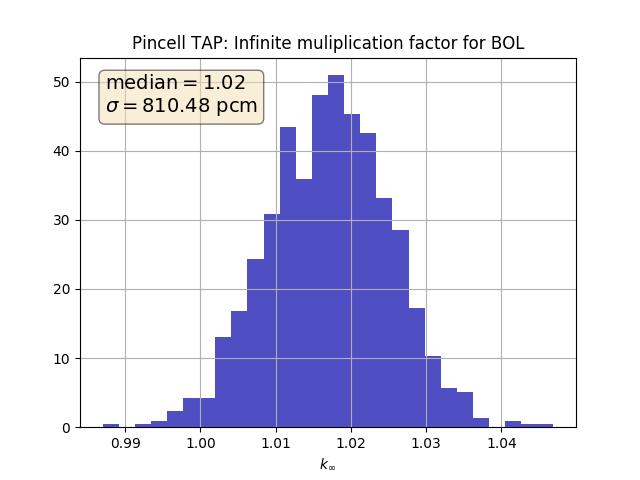

<IPython.core.display.Javascript object>


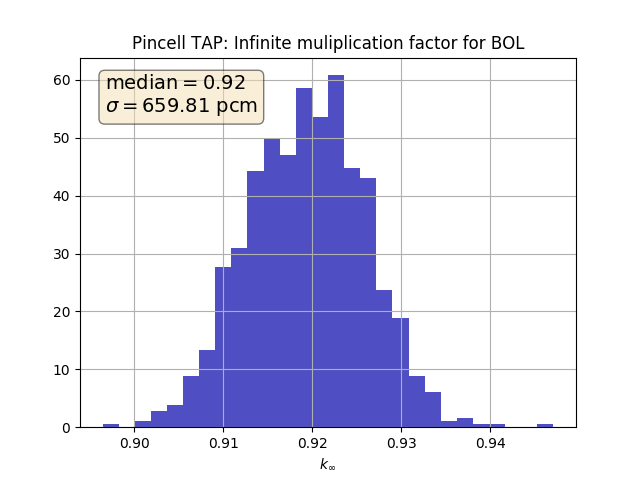

In [4]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)

textstr = '\n'.join((
    r'$\mathrm{median}=%.2f$' % (k_eff[0]),
    r'$\sigma=%.2f$ pcm' % (std_k[0])))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.hist(k_ds_array[:,0], bins='auto', density=True, histtype='stepfilled', color='#0504aa',alpha=0.7)

ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#ax.legend(loc=0)
ax.set_xlabel(r'$k_{\infty}$')
ax.set_title('Pincell TAP: Infinite muliplication factor for BOL')
fig_1.show()

# Initialize figure
fig_2 = matplotlib.pyplot.figure(2)
ax = fig_2.add_subplot(111)
ax.grid(True)
ax.hist(k_ds_array[:,-1], bins='auto', density=True, histtype='stepfilled', color='#0504aa',alpha=0.7)

textstr = '\n'.join((
    r'$\mathrm{median}=%.2f$' % (k_eff[-1]),
    r'$\sigma=%.2f$ pcm' % (std_k[-1])))

ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#ax.legend(loc=0)
ax.set_xlabel(r'$k_{\infty}$')

ax.set_title('Pincell TAP: Infinite muliplication factor for BOL')
fig_2.show()

<IPython.core.display.Javascript object>


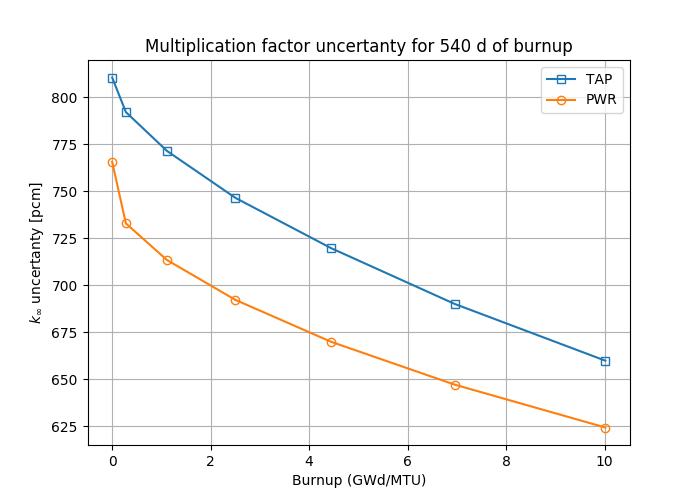

In [5]:
std_k_pwr = np.loadtxt('./pwr_pincell.out')
# Initialize figure
fig_keff_std = matplotlib.pyplot.figure(3, figsize=[7,5])
ax = fig_keff_std.add_subplot(111)
ax.grid(True)
ax.plot(bu_ds, std_k, '-s', label='TAP', markerfacecolor="None")
ax.plot(bu_ds, std_k_pwr, '-o', label='PWR', markerfacecolor="None")

ax.legend(loc=0)
ax.set_ylabel(r'$k_{\infty}$ uncertanty [pcm]')
ax.set_xlabel('Burnup (GWd/MTU)')
ax.set_title('Multiplication factor uncertanty for 540 d of burnup')
fig_keff_std.show()
#fig_keff_std.savefig('keff_std_pwr_vs_tap.png', bbox_inches='tight', dpi=700)